In [1]:
from pathlib import Path
import yaml
import pandas as pd
#from utils import collect_res_dat

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import copy


## 5.1 - Propagating Embeddings

In [5]:
drop_ls = ["alpha", "delay", "trained_epochs", "batch_size", "context_size", "optim_cluster", "datamode", "ds_add_self", "ds_make_undir", "save_embeds", "walk_len", "walks_per_node", "device", "max_iter", "num_negative_samples", "patience"]

#longer string names for plots
n_va = "validation accuracy"
n_dfp = "iN2V delay / iter (FP, MatMul) "
n_d = "delay"
n_wms = r"$\alpha$"
n_wndiv = r"$\beta$"
n_p = "$r$"
n_lambda = "$\lambda$"

In [6]:
#hyperparams = ["lr", "embedding_dim", "p", "q", "delay_alpha"]

# dss = ["Pho", "Cora"]
# split = "43"
# ls = []
# for ds in dss:
#     tmp = "../results_comb/"+ds+"_"+split
#     ls.append(pd.read_pickle(tmp+".pkl"))
#     if Path(tmp+"_fp_loss_64.pkl").exists():
#         ls.append(pd.read_pickle(tmp+"_fp_loss_64.pkl"))
#     if Path(tmp+"_fp_loss_256.pkl").exists():
#         ls.append(pd.read_pickle(tmp+"_fp_loss_256.pkl"))

ls = [pd.read_pickle("../results_comb/R1_"+ds+"_43"+l+".pkl") for ds in ["Cora", "Pho", "WCS"] for l in ["", "l", "b", "a", "c"]]


#df = pd.read_pickle(tmp+".pkl")
df = pd.concat(ls, ignore_index=True).drop(["alpha", "delay"], axis=1)

#df = df[df.w_ms.eq(0) & df.w_ndiv.eq(0) & df.embedding_dim.eq(256) & df.p.eq(1) & df.q.eq(1)&df.lr.eq(0.01)]
df[["d", "alpha"]] = df.delay_alpha.str.split("_", expand=True)

df.d = df.d.astype(float)
#df.loc[df.alpha.eq("fp"), "d"] = df.loc[df.alpha.eq("fp"), "d"]/10 # #iter of fp is ~10-60, divide by 10 to put in same plot
df.val_acc = df.val_acc*100
df = df[df.d.le(10)]
df = df[df.alpha.ne("only") & df.alpha.ne("all") & df.alpha.ne("0") & df.alpha.ne("0.8")]
df.alpha = df.alpha.replace({"fp":"FP", "no":"MatMul", "all":"MM w norm"})
df = df.rename(columns={"val_acc":n_va,"d":n_dfp, "alpha":n_lambda})

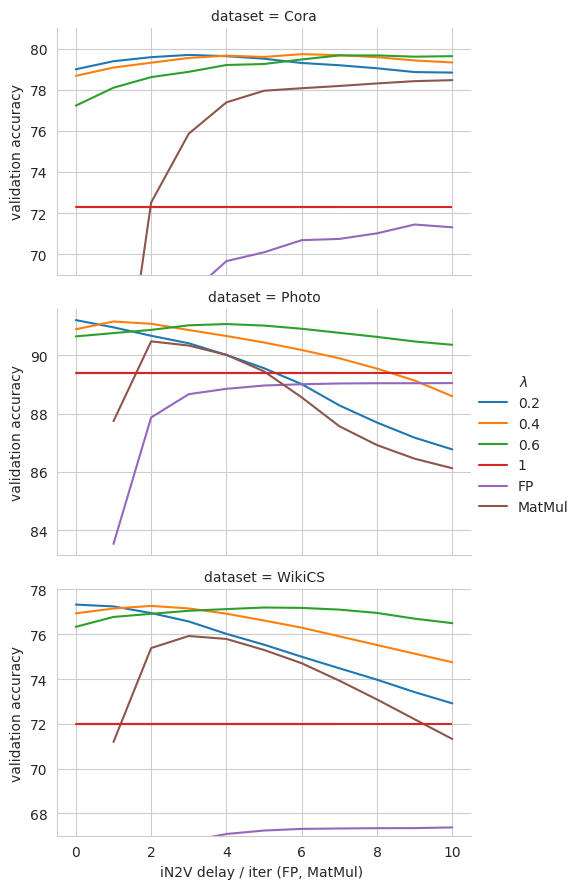

In [7]:
#sns.set_theme()
#sns.set(font_scale=1.1)
sns.set_style("whitegrid")

fg = sns.relplot(data=df, x=n_dfp, y=n_va, hue=n_lambda, row="dataset", kind="line", height=3 , aspect=1.7, errorbar=None, facet_kws={'sharey': False, 'sharex': True},)
for k in fg.axes_dict.keys():
    frozen = df[df.dataset.eq(k)].groupby("delay_alpha").mean(numeric_only=True).loc["0_1"][n_va]
    fg.axes_dict[k].hlines(y=frozen, xmin=0, xmax=10, color=sns.color_palette()[3], linestyle='-')
    if k == "Cora":
        fg.axes_dict[k].set_ylim((69, 81))
    if k == "WikiCS":
        fg.axes_dict[k].set_ylim((67, 78))

#sns.move_legend(fg, "lower center", bbox_to_anchor=(.45, 1), ncol=3)
#bbox = fg.legend.get_window_extent()
#fg.legend.get_title().set_position((-bbox.width/2-20, -20))

#plt.hlines(y=frozen, xmin=0, xmax=6, color=sns.color_palette()[5], linestyle='--')
plt.savefig("imgs/R_lambda_delay.pdf", bbox_inches='tight')

## 5.2 -- Preparing Embeddings

In [10]:
# dss = ["Pho", "Cora"]
# split = "43"
# ls = []
# for ds in dss:
#     tmp = "../results_comb/"+ds+"_"+split
#     ls.append(pd.read_pickle(tmp+".pkl"))
#     if Path(tmp+"_fp_loss_64.pkl").exists():
#         ls.append(pd.read_pickle(tmp+"_fp_loss_64.pkl"))
#     if Path(tmp+"_fp_loss_256.pkl").exists():
#         ls.append(pd.read_pickle(tmp+"_fp_loss_256.pkl"))

ls = [pd.read_pickle("../results_comb/R2_"+ds+"_43"+l+".pkl") for ds in ["Cora", "WCS"] for l in ["p","l"]]


#df = pd.read_pickle(tmp+".pkl")
df = pd.concat(ls, ignore_index=True).drop(["alpha", "delay"], axis=1)
df = df[df.w_ms.eq(0) & df.w_ndiv.eq(0)]


#df = df[df.w_ms.eq(0) & df.w_ndiv.eq(0) & df.embedding_dim.eq(256) & df.p.eq(1) & df.q.eq(1)&df.lr.eq(0.01)]
df[["d", "alpha"]] = df.delay_alpha.str.split("_", expand=True)
df = df[df.d.ne("1") & df.d.ne("3") &df.d.ne("5")]
df.val_acc = df.val_acc*100

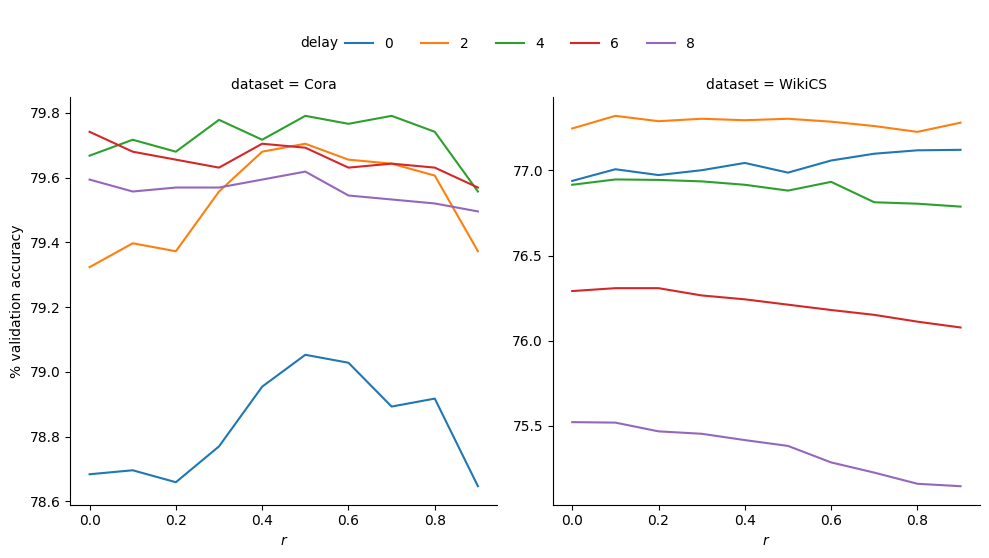

In [11]:
df = df.rename(columns={"val_acc":n_va,"prob_replace":n_p, "d":n_d})

fg = sns.relplot(data=df, x=n_p, y=n_va, hue=n_d, col="dataset", kind="line", errorbar=None, facet_kws={'sharey': False, 'sharex': True},)

sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=7)
bbox = fg.legend.get_window_extent()
fg.legend.get_title().set_position((-bbox.width/2-20, -20))

#fg.savefig("imgs/R_prob.pdf")

In [32]:
# dss = ["Pho", "Cora"]
# split = "43"
# ls = []
# for ds in dss:
#     tmp = "../results_comb/"+ds+"_"+split
#     ls.append(pd.read_pickle(tmp+".pkl"))
#     if Path(tmp+"_fp_loss_64.pkl").exists():
#         ls.append(pd.read_pickle(tmp+"_fp_loss_64.pkl"))
#     if Path(tmp+"_fp_loss_256.pkl").exists():
#         ls.append(pd.read_pickle(tmp+"_fp_loss_256.pkl"))

ls = [pd.read_pickle("../results_comb/R2_"+ds+"_43"+l+".pkl") for ds in ["WCS"] for l in ["l", "l2", "l3", "l4", "l5", "l6", "l_f2"]]


#df = pd.read_pickle(tmp+".pkl")
df = pd.concat(ls, ignore_index=True).drop(drop_ls, axis=1)

#df = df[df.w_ms.eq(0) & df.w_ndiv.eq(0) & df.embedding_dim.eq(256) & df.p.eq(1) & df.q.eq(1)&df.lr.eq(0.01)]
df[["d", "alpha"]] = df.delay_alpha.str.split("_", expand=True)
df = df[df.d.eq("6")]
df.w_ndiv = df.w_ndiv.astype(float)
df.val_acc = df.val_acc*100

df = df[df.w_ndiv.le(10)]
df = df[df.w_ms.le(100)]
df = df[df.w_ms.ne(0.001)]
df = df.rename(columns={"val_acc":n_va,"w_ms":n_wms, "w_ndiv":n_wndiv})


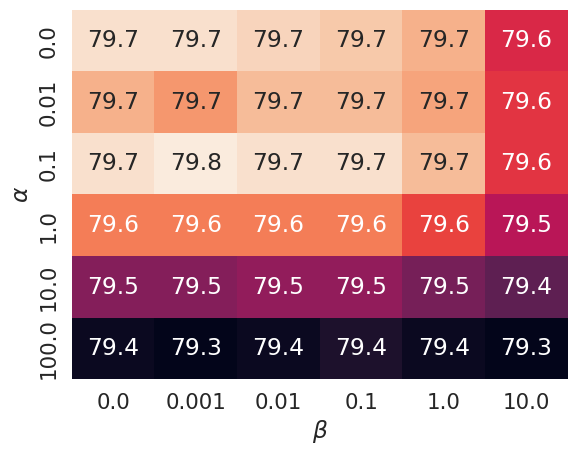

In [29]:
sns.set(font_scale=1.4)

df_plot = df.groupby([n_wms, n_wndiv]).mean(numeric_only=True).reset_index().pivot(index=n_wms, columns=n_wndiv, values=n_va)
sns.heatmap(df_plot, annot=True, fmt=".1f", cbar=False)
plt.savefig("imgs/R_loss_cora.pdf", bbox_inches='tight')

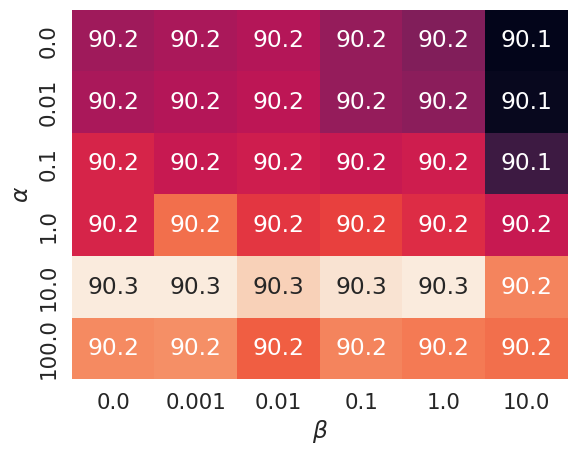

In [31]:
sns.set(font_scale=1.4)


df_plot = df.groupby([n_wms, n_wndiv]).mean(numeric_only=True).reset_index().pivot(index=n_wms, columns=n_wndiv, values=n_va)
sns.heatmap(df_plot, annot=True, fmt=".1f", cbar=False)
plt.savefig("imgs/R_loss_pho.pdf", bbox_inches='tight')

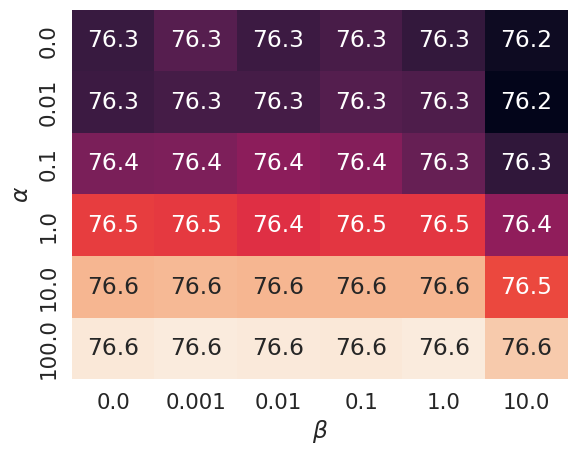

In [33]:
sns.set(font_scale=1.4)

df_plot = df.groupby([n_wms, n_wndiv]).mean(numeric_only=True).reset_index().pivot(index=n_wms, columns=n_wndiv, values=n_va)
sns.heatmap(df_plot, annot=True, fmt=".1f", cbar=False)
plt.savefig("imgs/R_loss_wcs.pdf", bbox_inches='tight')

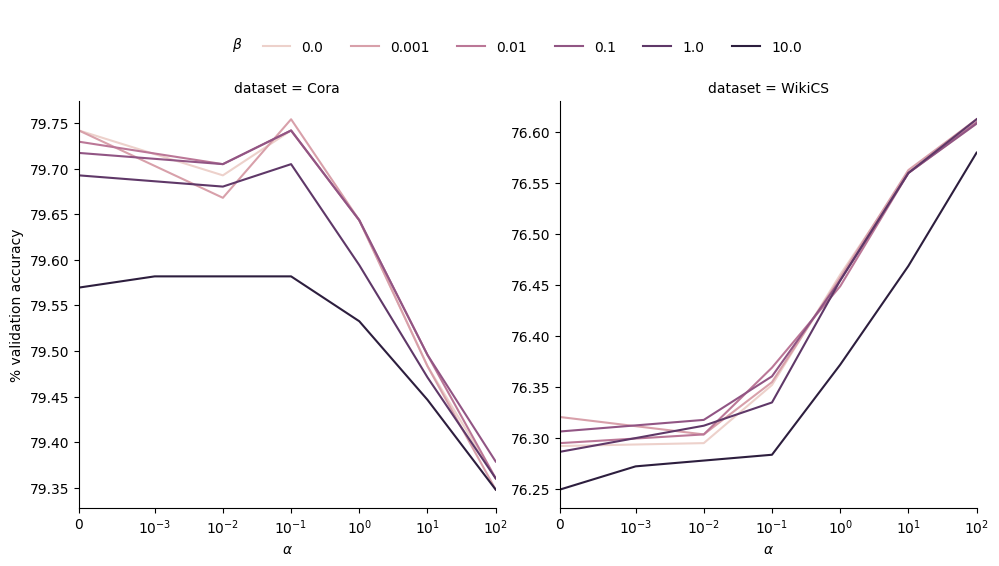

In [13]:
#df.alpha = df.alpha.replace({"fp":"FP", "1":"1, frozen"})
df = df.rename(columns={"val_acc":n_va,"w_ms":n_wms, "w_ndiv":n_wndiv})

#fg = sns.relplot(data=df, x="w_ms", y="val_acc", hue ="w_ndiv", col="dataset", kind="line", errorbar=None, facet_kws={'sharey': False, 'sharex': True},)
fg = sns.relplot(data=df, x=n_wms, y=n_va, hue =n_wndiv, hue_norm=matplotlib.colors.SymLogNorm(linthresh=0.001), col="dataset", kind="line", errorbar=None, facet_kws={'sharey': False, 'sharex': True},) 

plt.xscale("symlog", linthresh=0.001)
plt.xlim((0,100))
sns.move_legend(fg, "lower center", bbox_to_anchor=(.5, 1), ncol=7)
bbox = fg.legend.get_window_extent()
fg.legend.get_title().set_position((-bbox.width/2-20, -20))

#plt.savefig("imgs/R_loss.pdf")

## 5.3 - Final Results / Putting everything together

In [20]:
n_testacc = "% test accuracy"
n_cat = "node features"
n_ds = "dataset"
n_extend = "feature extension"
n_split = "% of data in training"

In [23]:
def get_acc(df):
    params = []
    for c in df.drop(["val_acc", "test_acc", "statrep", "trained_epochs"], axis=1).columns:
        if len(df[c].unique())>1:
            params.append(c)
    tmp = df.groupby(params)
    mean = tmp.mean(numeric_only = True)
    #std = tmp.std(numeric_only = True)
    
    ix = mean.val_acc.idxmax()
    #num_occ = mean.val_acc.value_counts()[mean.loc[ix].val_acc]
    #check wether max is unique, if not use lowest sd one
    # if num_occ > 1:
    #     max_df = mean[mean.val_acc.eq(mean.loc[ix].val_acc)]
    #     for index, row in max_df.iterrows():
    #         if std.loc[index].val_acc < std.loc[ix].val_acc:
    #             ix = index

    return mean.loc[ix].test_acc*100
    

def collect_df(ds):
    splits = ["145", "24", "43", "62", "81"]
    models = ["MLP", "Sage"]
    result_ls = [] #ds, split, model, datamode
    for split in splits:
        for model in models:
            tmp = "../results_comb/F_"+ds+"_"+split+"_"+model
            ls = [pd.read_pickle(tmp+".pkl")]
            if Path(tmp+"_e.pkl").exists():
                ls.append(pd.read_pickle(tmp+"_e.pkl"))
            if Path(tmp+"_jk.pkl").exists():
                ls.append(pd.read_pickle(tmp+"_jk.pkl"))

        #check that it has all jk options + 5 layers
            
            df = pd.concat(ls, ignore_index=True).drop([
            "val_loss", "test_loss", "loss_hist", "valtest_time", "train_time", "record_train", "save_models", "batch_size", "batch_size_test", "batch_size_val", "alpha", "delay", "save_embeds",
            "context_size", "num_negative_samples", "max_iter", "patience"], axis=1, errors="ignore")

            for dm in df.datamode.unique():
                result_ls.append((ds, split, model, dm, get_acc(df[df.datamode.eq(dm)])))
    return pd.DataFrame(result_ls, columns=["ds", "split", "model", "datamode", "test_acc"])

def process(df):
    df[["cat", "extend"]] = df.datamode.str.split("_", expand=True).fillna(value="gra")
    df.extend = df.extend.replace({"ba":"cold", "lo":"loss based", "tr":"train only", "po":"post hoc", "gra": "graph only", "re":"sampling based"})
    df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })
    df.cat = df.cat.replace({"cat":"concatenate", "emb":"embedding only", "gra":"original only"})
    df.ds = df.ds.replace({"Cite":"Citeseer", "PM":"Pubmed", "Com":"Computers", "Pho":"Photo", "Act":"Actor", "Ar":"Amazon-ratings", "Re":"Roman-empire" })
    return df.rename(columns={"split": n_split, "test_acc":n_testacc, "cat":n_cat, "ds":n_ds, "extend":n_extend})


In [39]:
df = pd.concat([collect_df(x) for x in ["Cora", "Cite", "PM", "Com", "Pho", "Act", "Ar", "Re"]], ignore_index=True)
df = process(df)

/tmp/ipykernel_1135845/2506484167.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(55.0, 78.0)

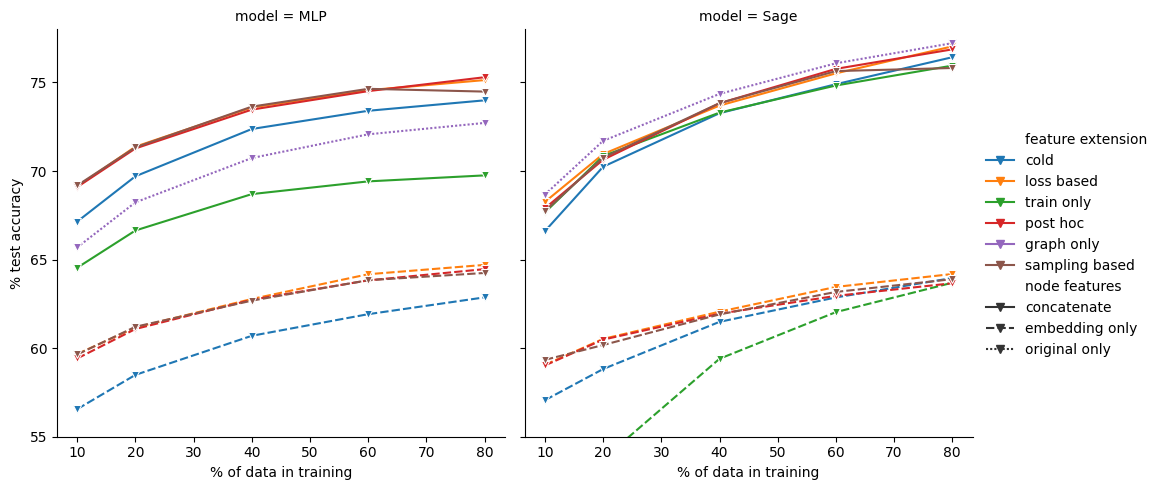

In [41]:
sns.relplot(data=df, x=n_split, y=n_testacc, hue=n_extend, style=n_cat, col="model", kind="line", errorbar=None, facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((55, 78))

In [31]:
df = pd.concat([collect_df(x) for x in ["Cora", "Cite", "PM", "Com", "Pho"]], ignore_index=True)
df_hom = process(df)

/tmp/ipykernel_1135845/2506484167.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(75.0, 89.0)

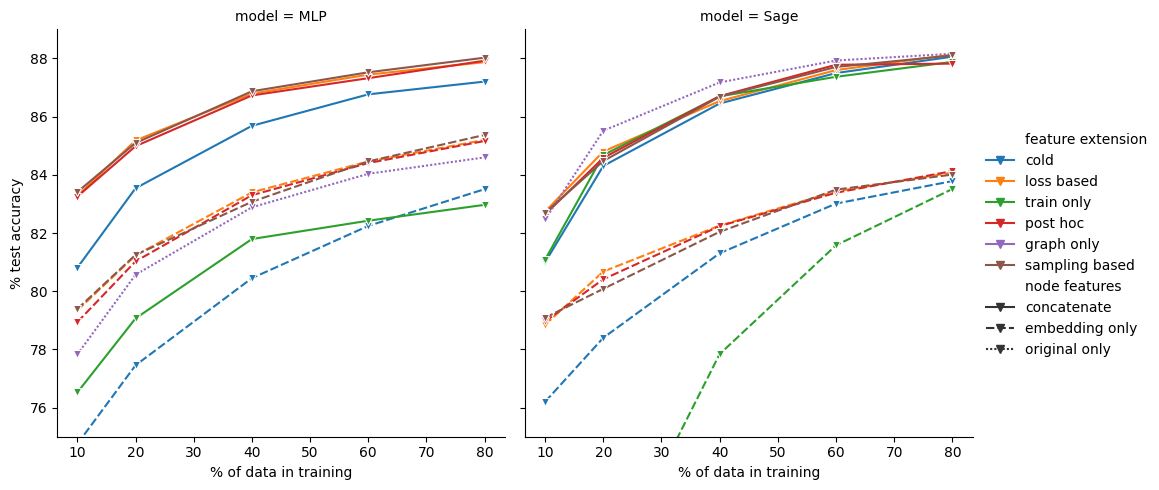

In [36]:
sns.relplot(data=df_hom, x=n_split, y=n_testacc, hue=n_extend, style=n_cat, col="model", kind="line", errorbar=None, facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((75, 89))

In [37]:
df = pd.concat([collect_df(x) for x in ["Act", "Ar", "Re"]], ignore_index=True)
df_het = process(df)

/tmp/ipykernel_1135845/2506484167.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


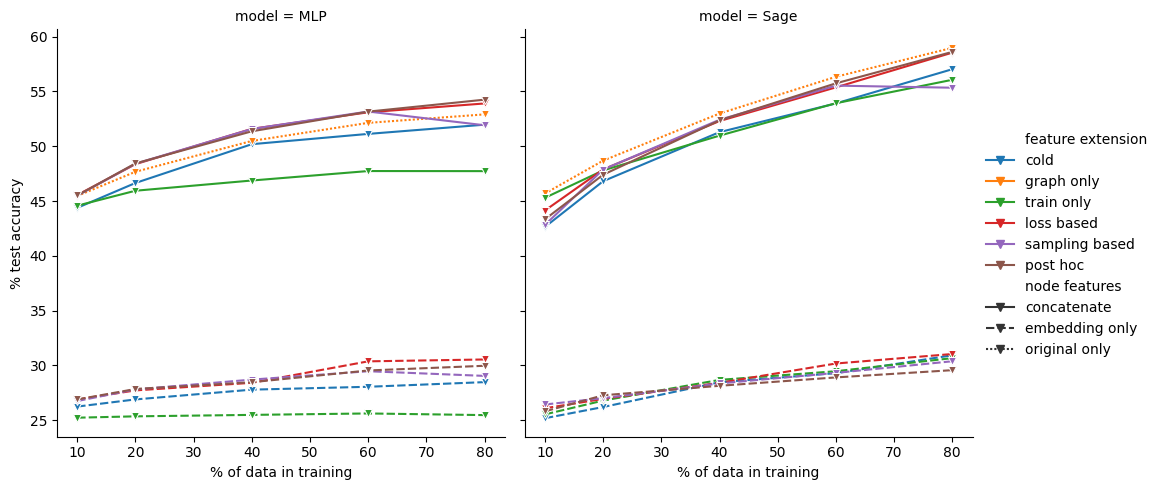

In [38]:
sns.relplot(data=df_het, x=n_split, y=n_testacc, hue=n_extend, style=n_cat, col="model", kind="line", errorbar=None, facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
#plt.ylim((55, 78))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(70.0, 90.0)

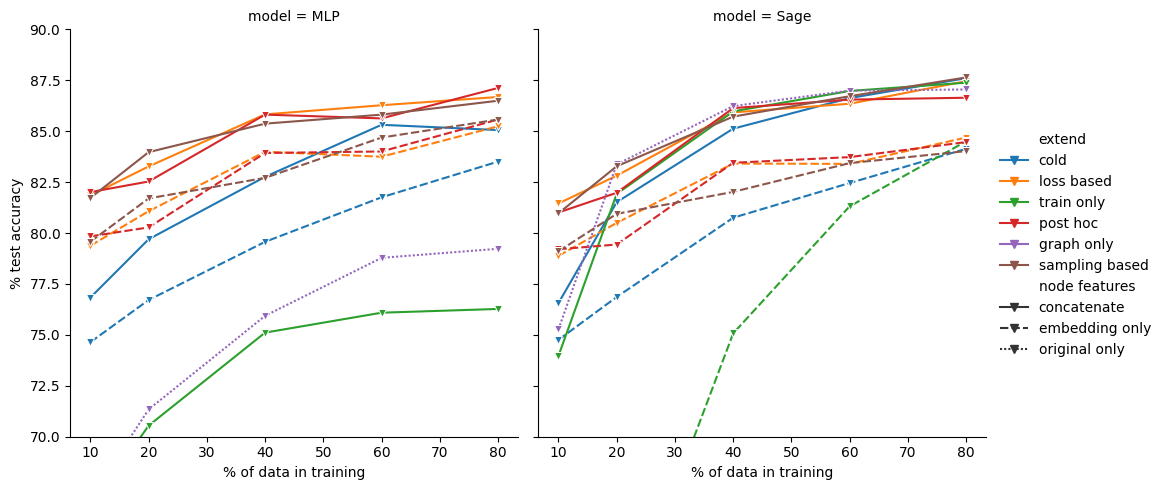

In [42]:
df = collect_df("Cora")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((70, 90))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(60.0, 80.0)

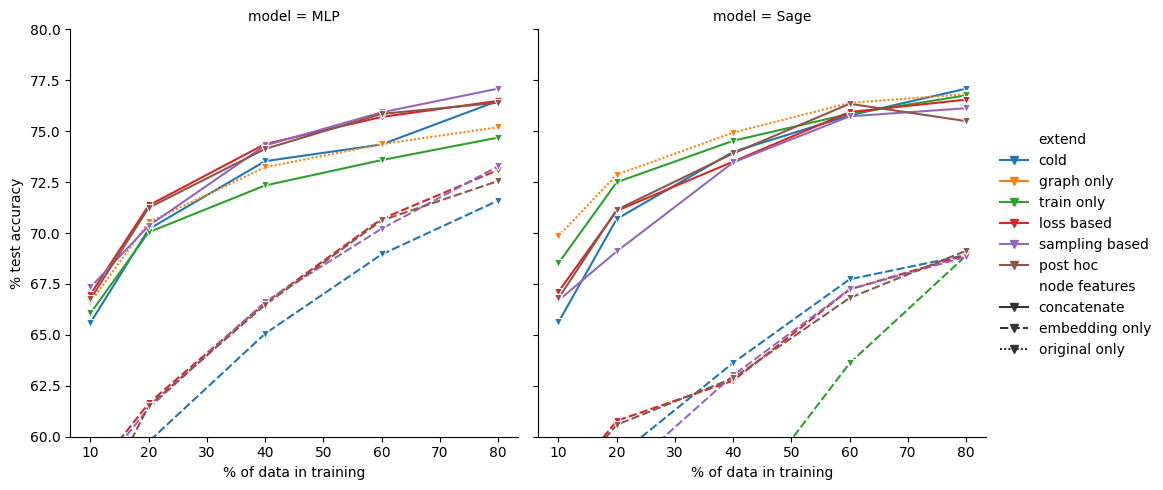

In [43]:
df = collect_df("Cite")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((60, 80))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(72.0, 92.0)

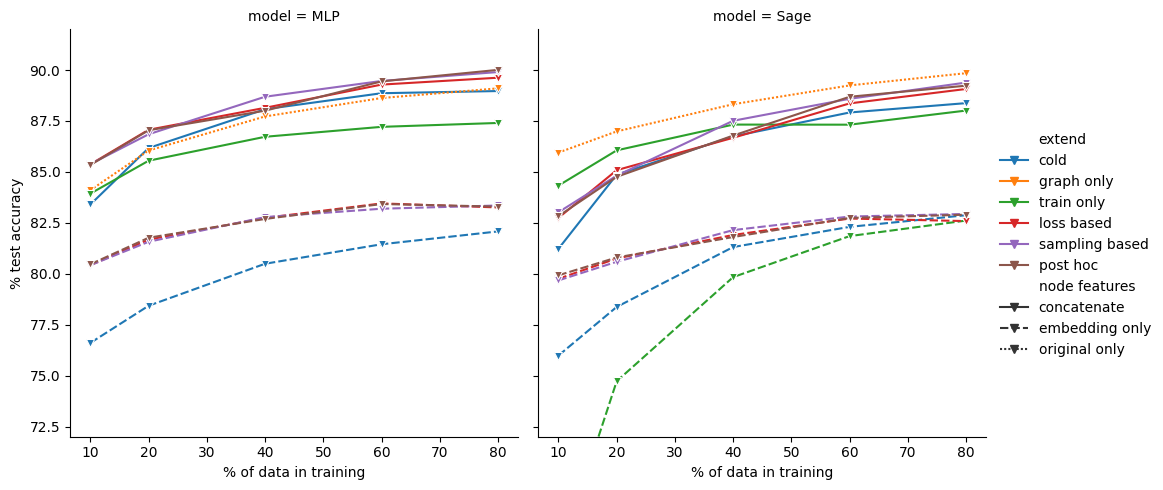

In [44]:
df = collect_df("PM")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((72, 92))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(83.0, 93.0)

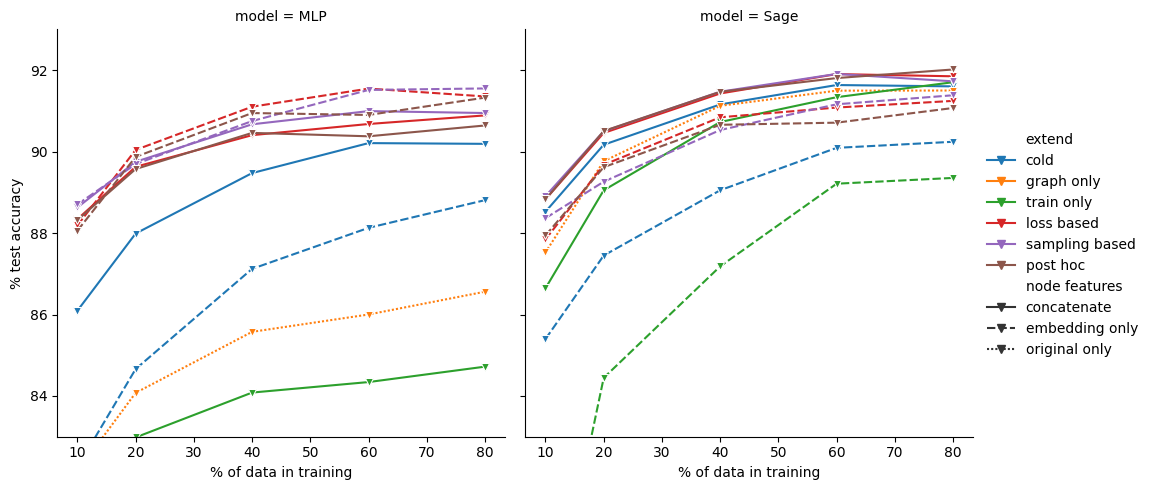

In [45]:
df = collect_df("Com")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((83, 93))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


(87.0, 97.0)

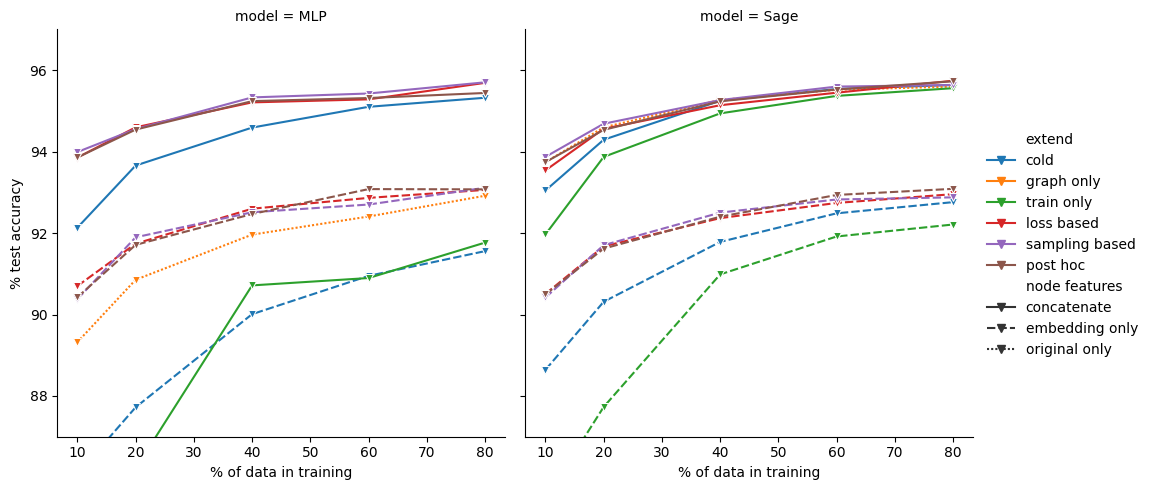

In [46]:
df = collect_df("Pho")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
plt.ylim((87, 97))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


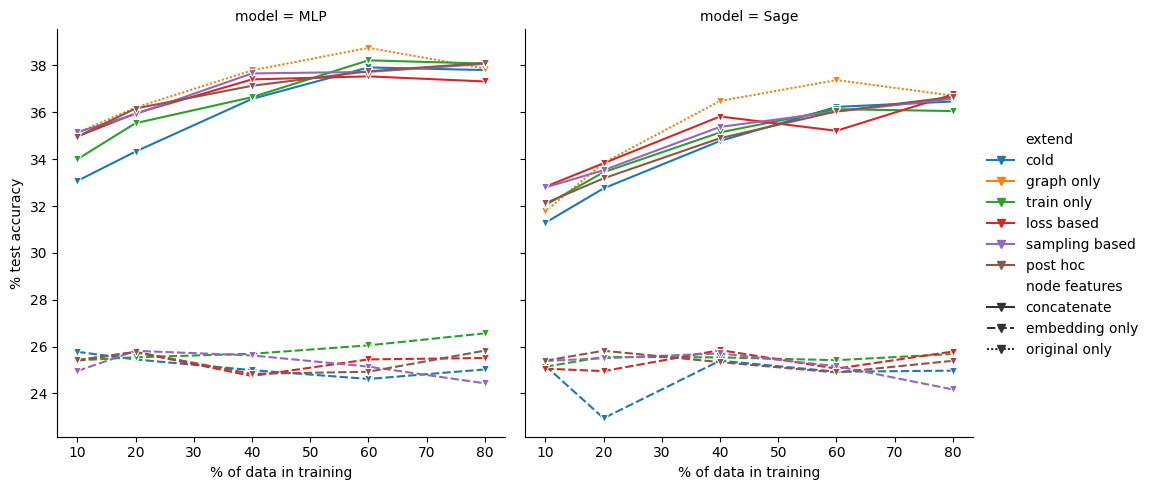

In [47]:
df = collect_df("Act")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
#plt.ylim((70, 90))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


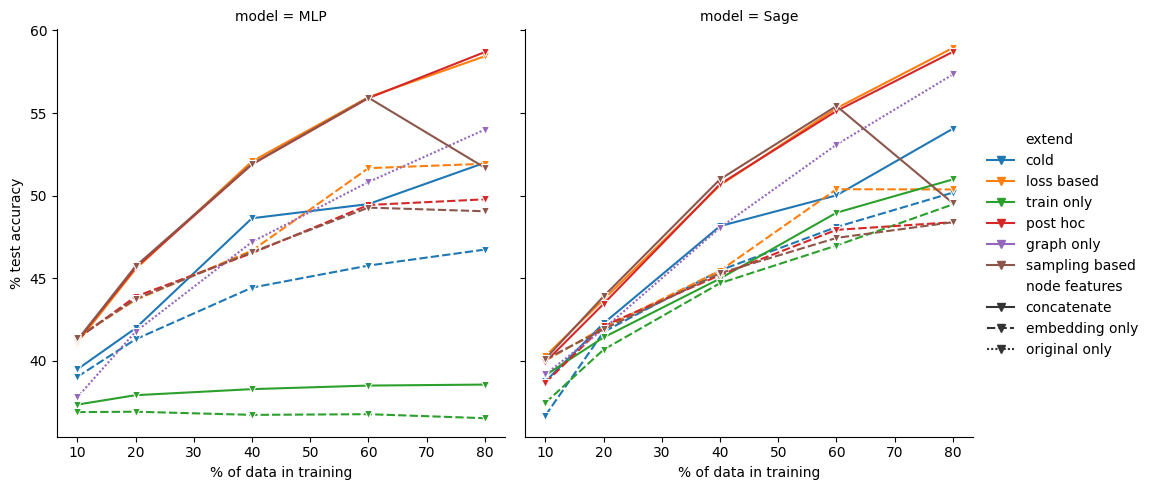

In [48]:
df = collect_df("Ar")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
#plt.ylim((70, 90))

/tmp/ipykernel_36600/2367988229.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


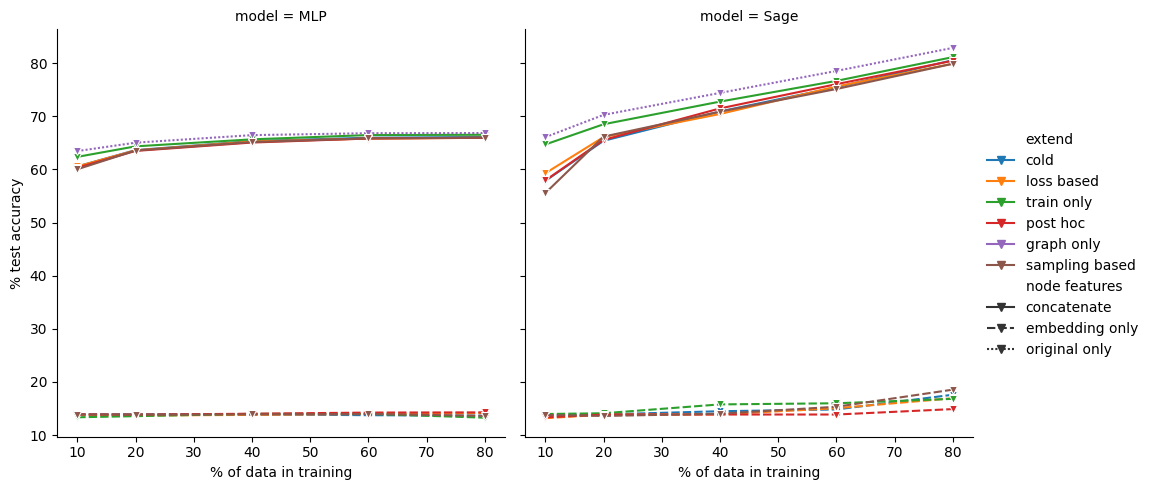

In [49]:
df = collect_df("Re")
df = process(df)
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", kind="line",facet_kws={'sharey': True, 'sharex': True}, marker="v")#, markersize=20)
#plt.ylim((70, 90))

In [91]:
df = pd.concat([collect_df(x) for x in ["Cora", "Cite", "PM", "Com", "Pho", "Act", "Ar", "Re"]])
df = process(df)
df["dataset, model"] = df.dataset + ", " + df.model

/tmp/ipykernel_36600/3082829608.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


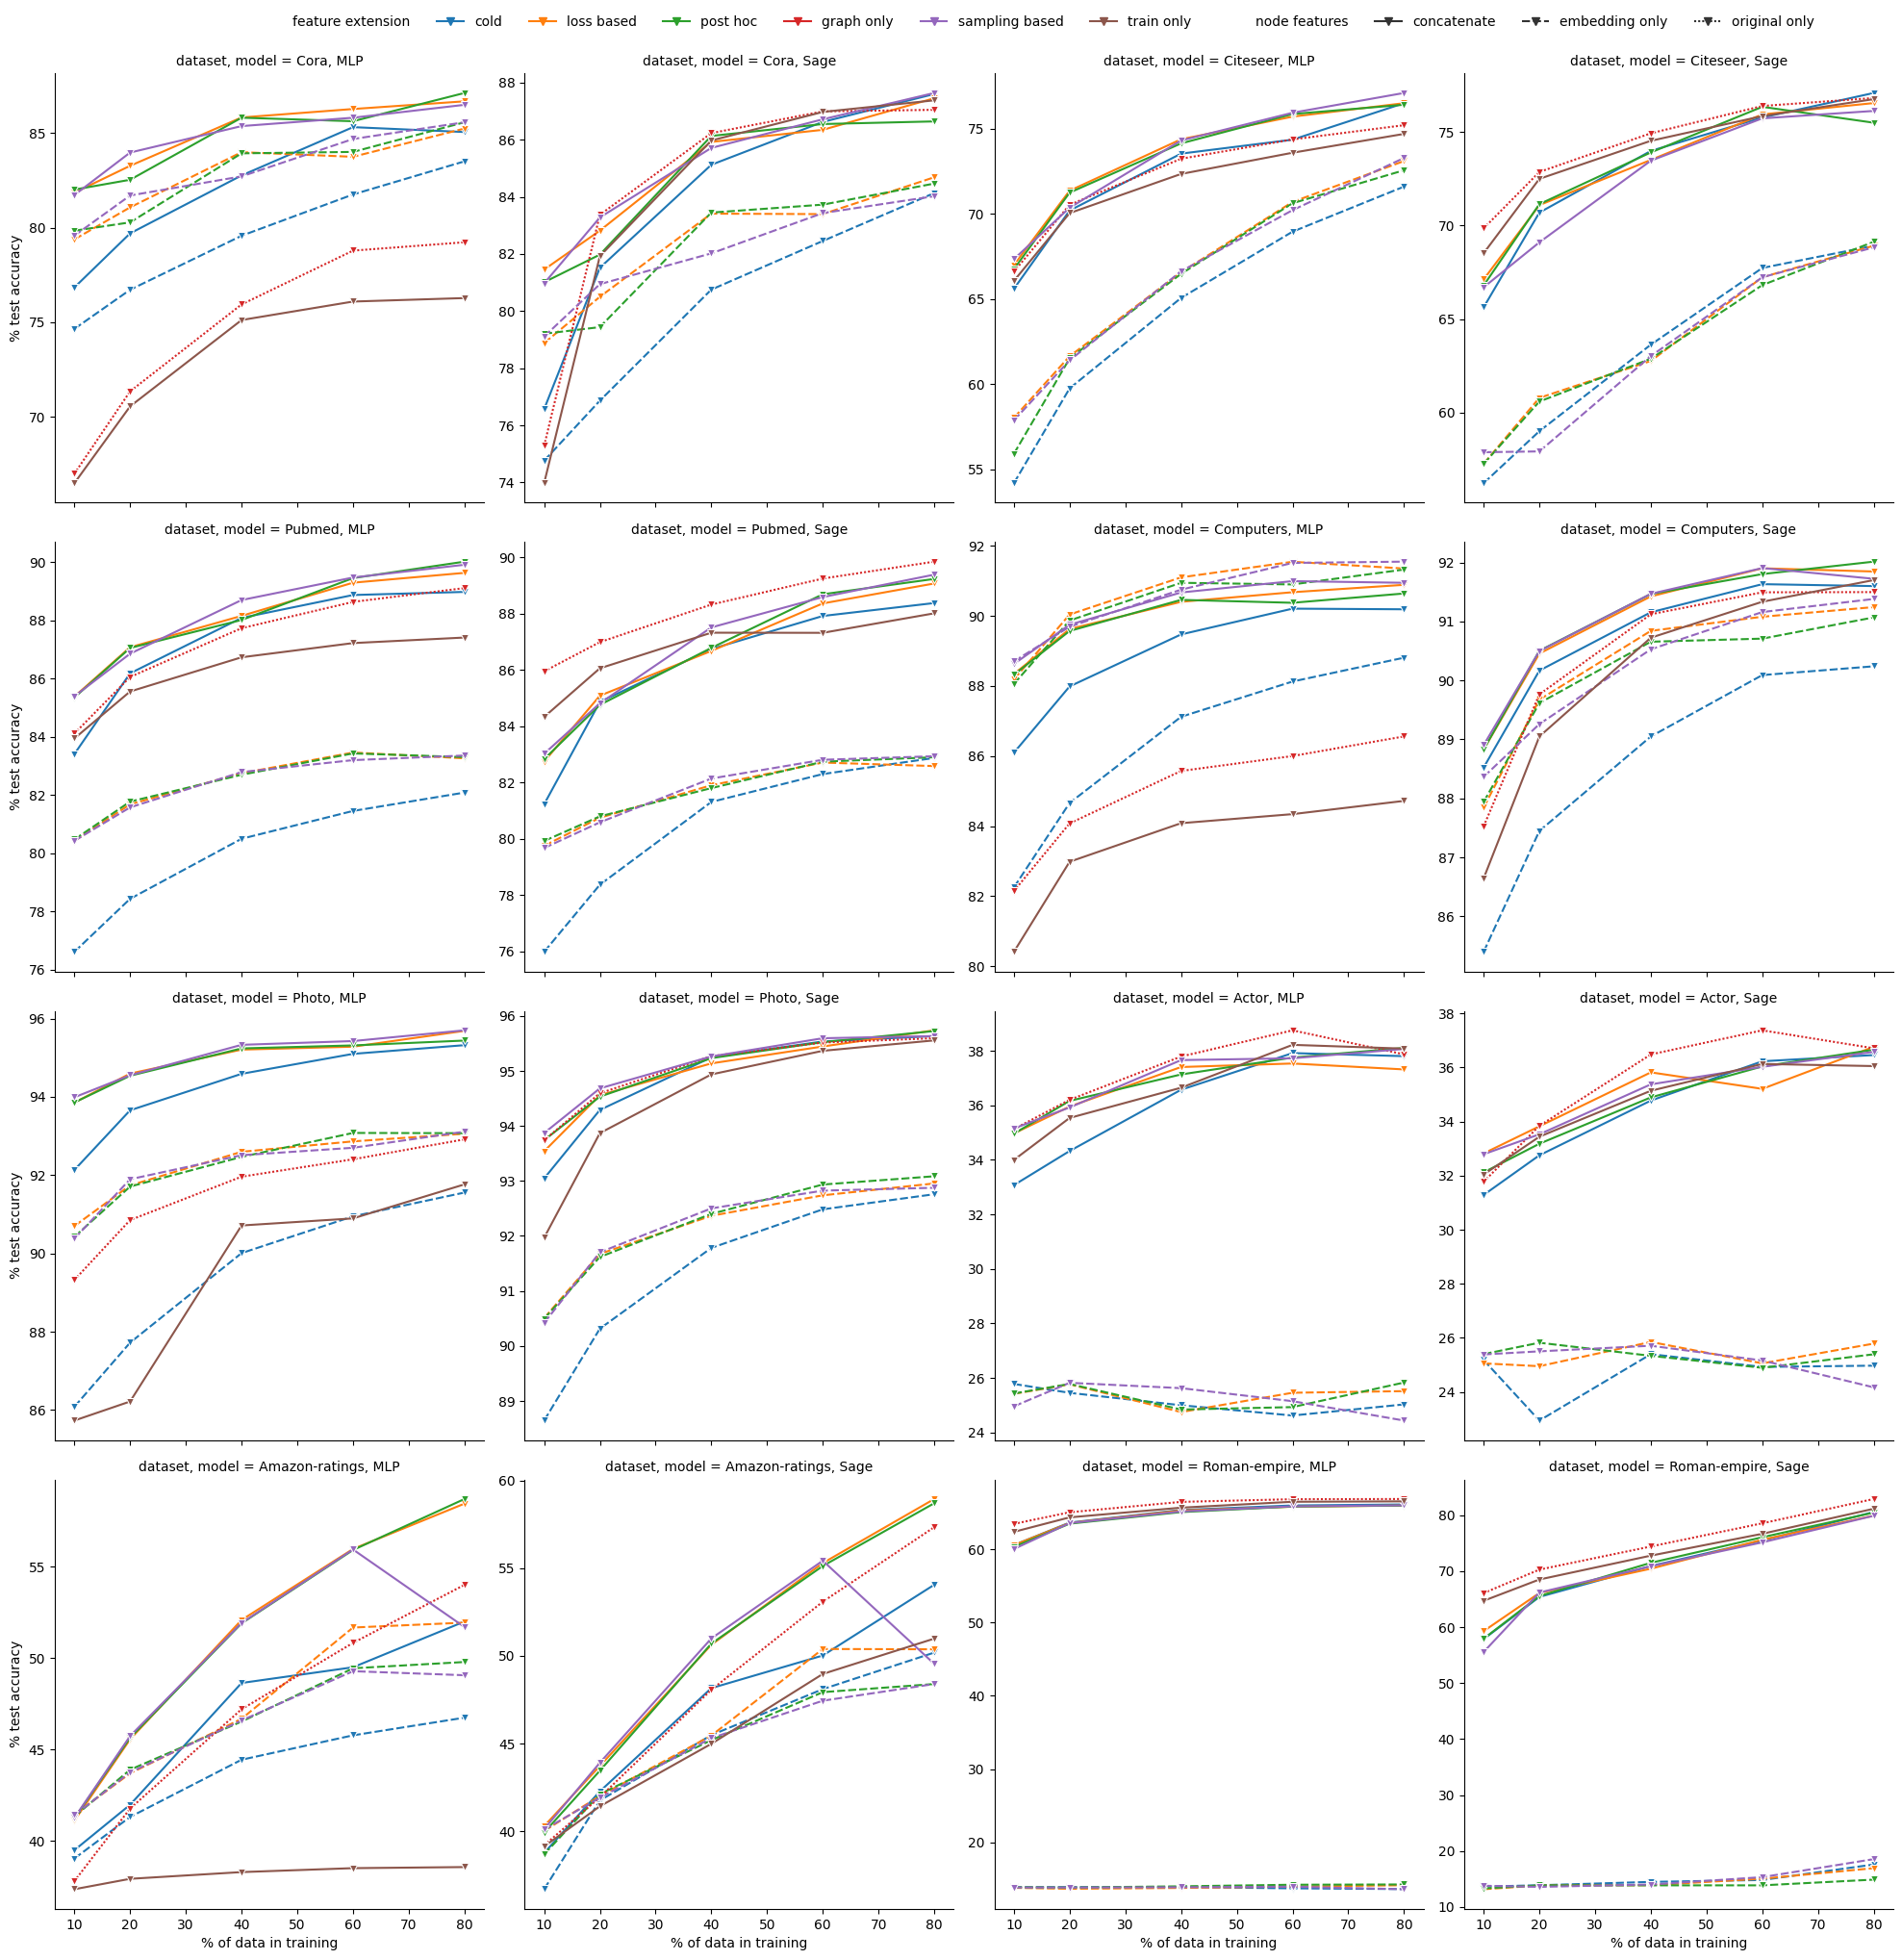

In [92]:
df = df[df["feature extension"].ne("train only") | df["node features"].ne("embedding only")] #remove lowest line for better y scaling
ax = sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="feature extension", style="node features", col="dataset, model", col_wrap=4, kind="line",facet_kws={'sharey': False, 'sharex': True}, marker="v")#, markersize=20)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=11, title=None, frameon=False)
#plt.savefig('imgs/res_over_split_sharey.pdf', bbox_inches='tight')
plt.savefig('imgs/res_over_split.pdf', bbox_inches='tight')


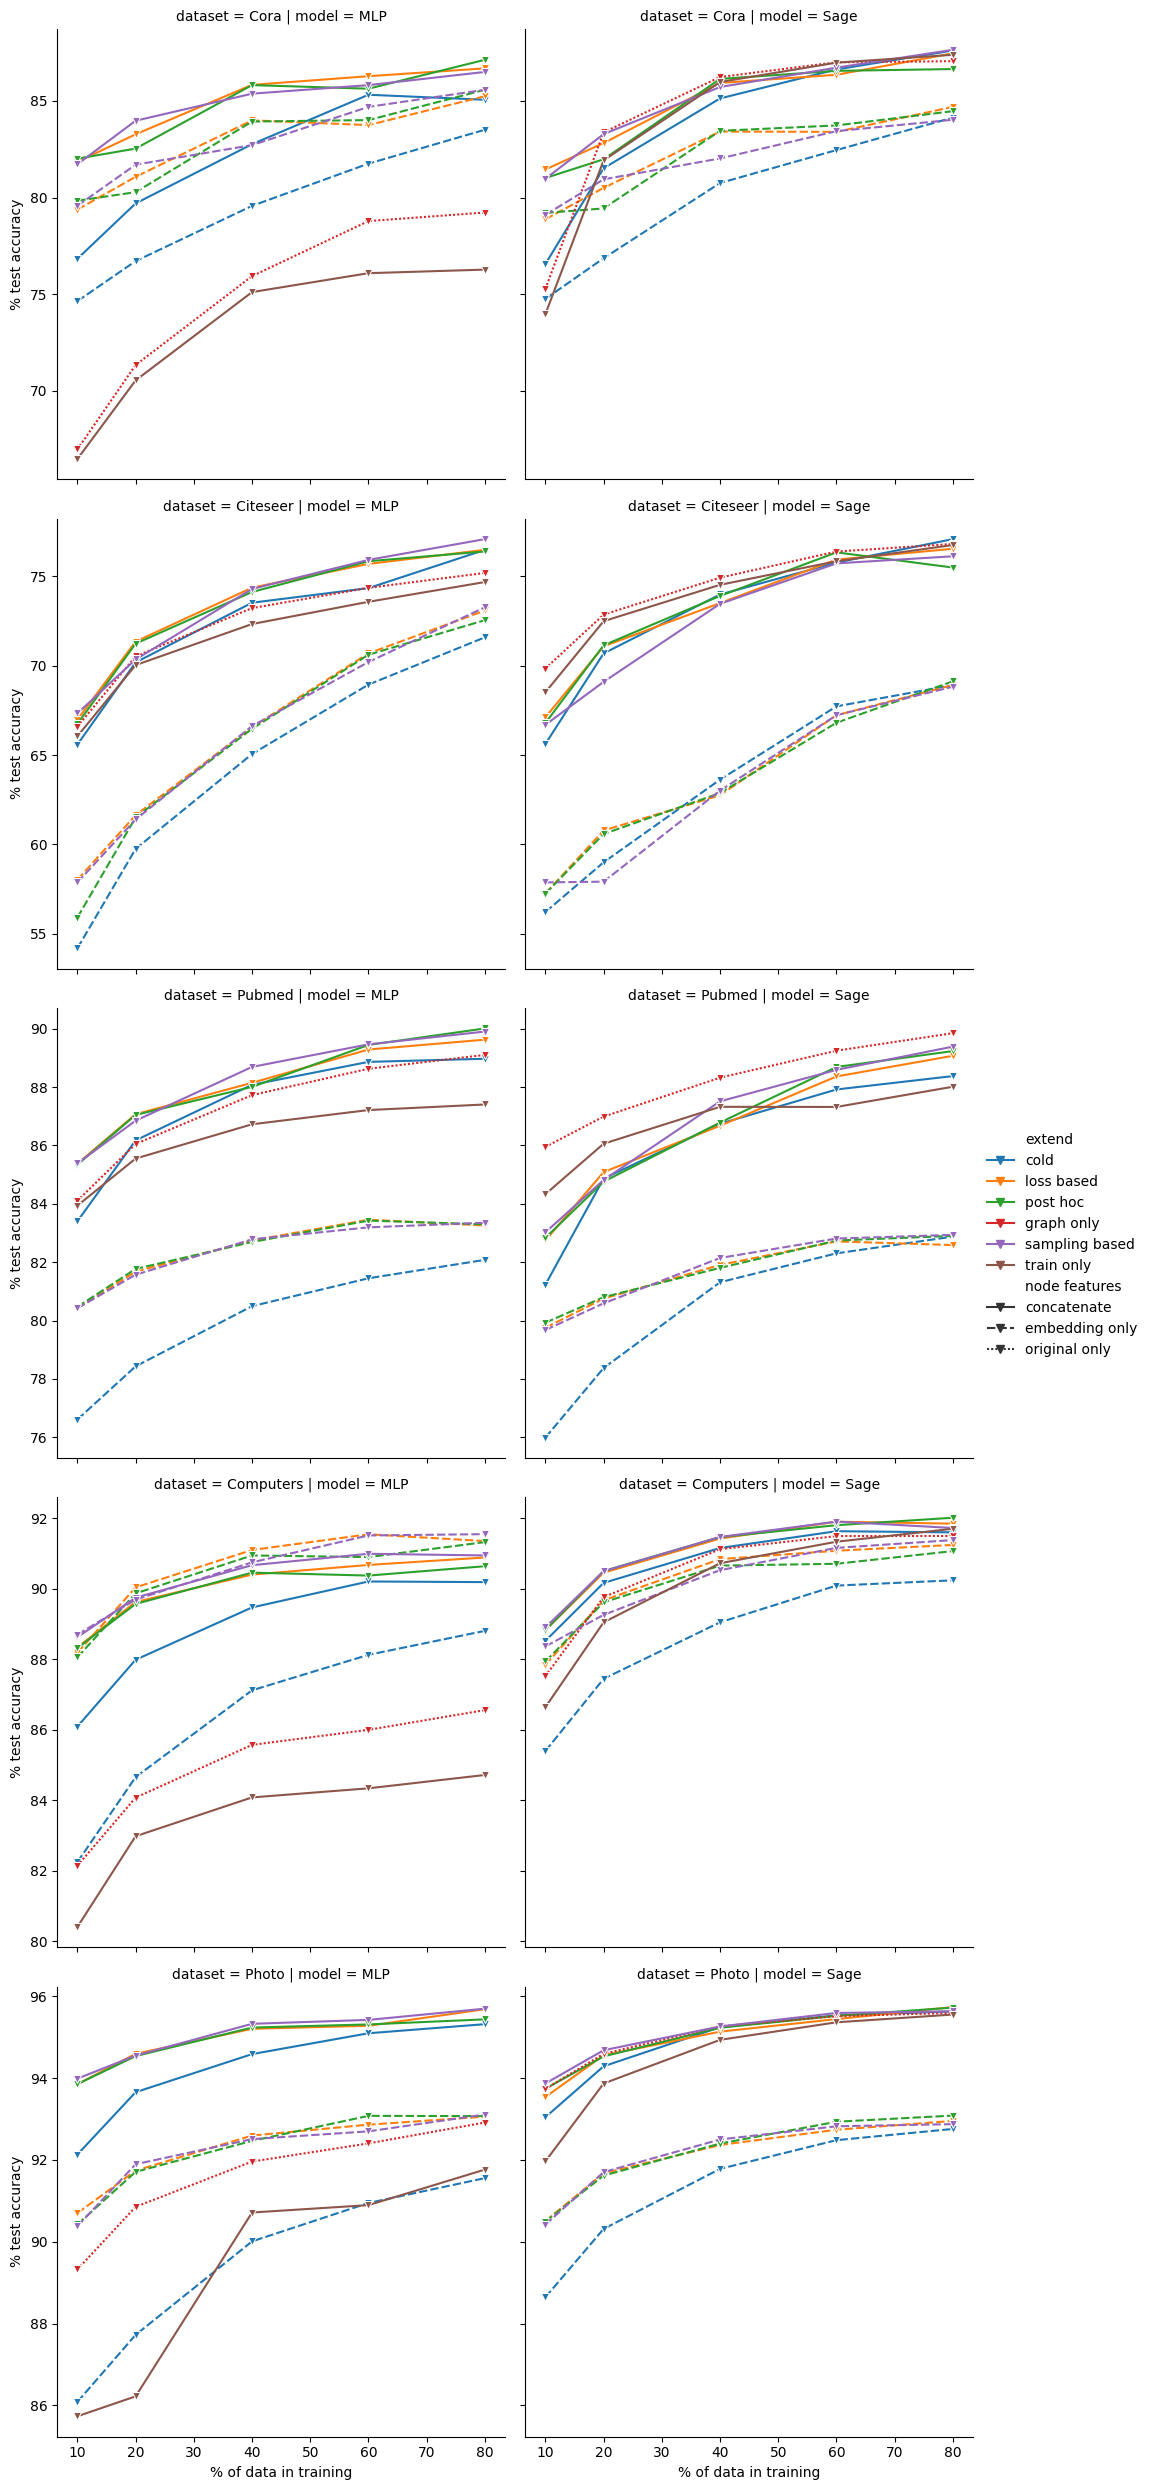

In [64]:
df = df[df.extend.ne("train only") | df["node features"].ne("embedding only")] #remove lowest line for better y scaling
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", row="dataset", kind="line",facet_kws={'sharey': "row", 'sharex': True}, marker="v")#, markersize=20)
plt.savefig('imgs/homo_res_over_split.pdf', bbox_inches='tight')

In [65]:
df = pd.concat([collect_df(x) for x in ["Act", "Ar", "Re"]])
df = process(df)


/tmp/ipykernel_36600/1016634007.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.split = df.split.replace({"145":10, "24":20, "43":40, "62":60, "81":80, })


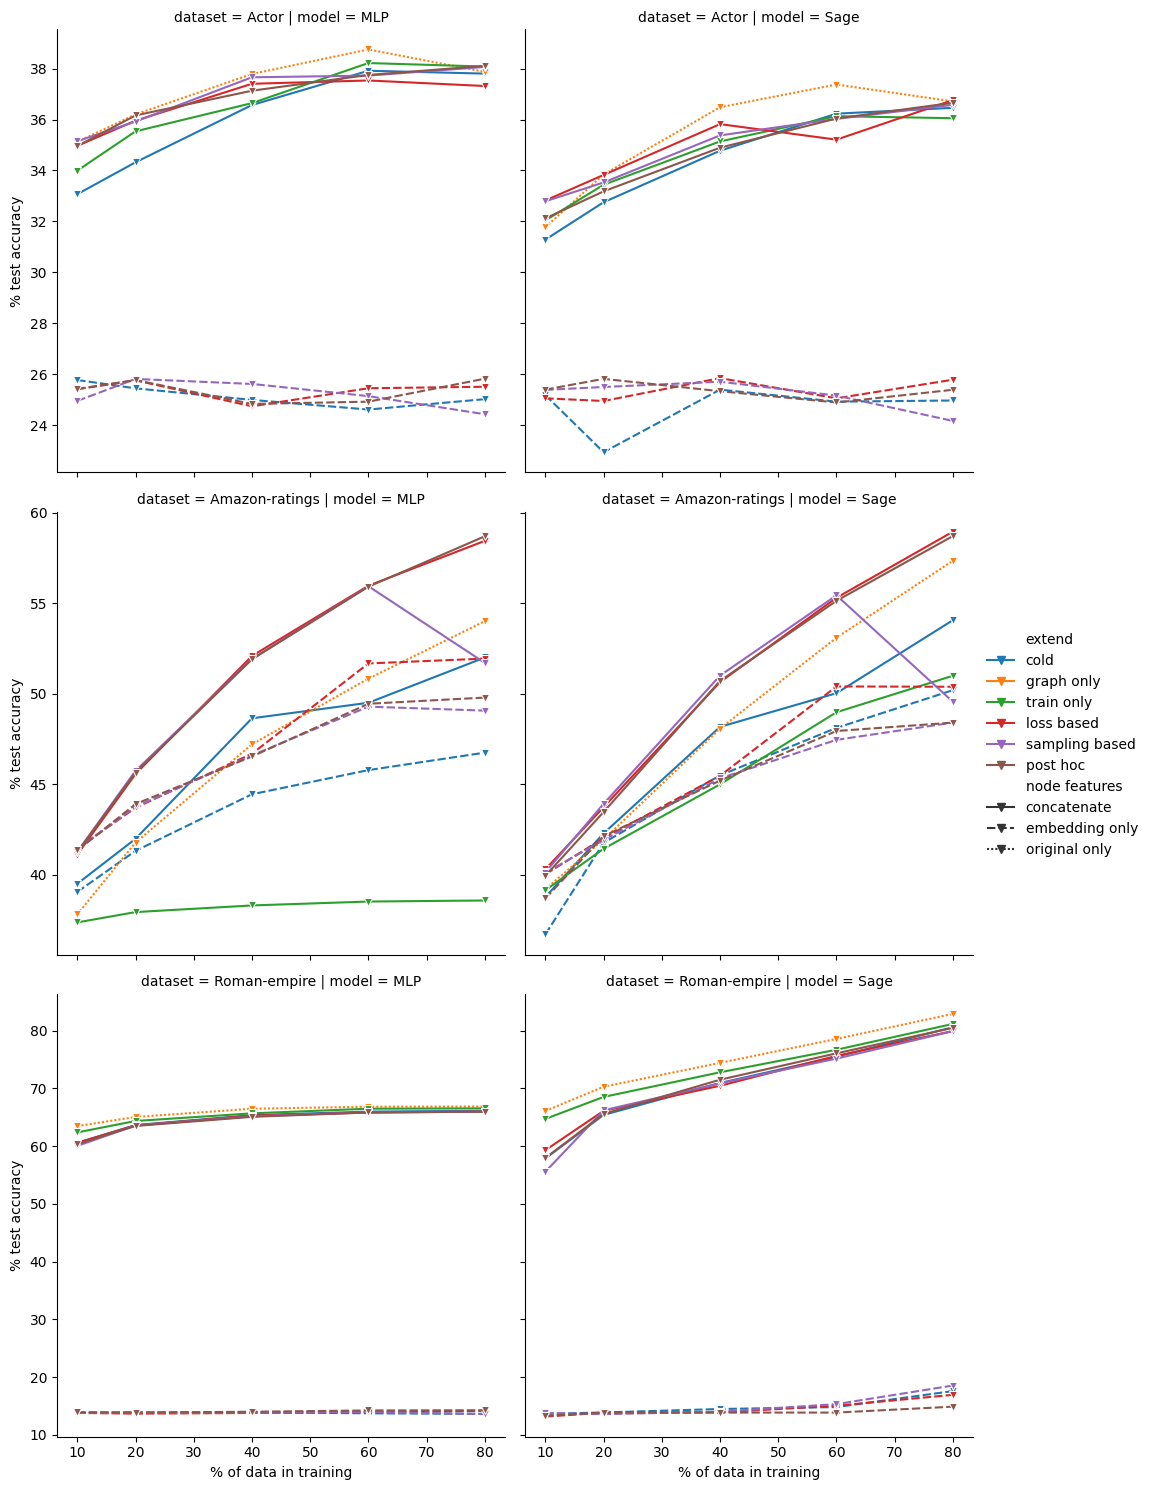

In [66]:
df = df[df.extend.ne("train only") | df["node features"].ne("embedding only")] #remove lowest line for better y scaling
sns.relplot(data=df, x="% of data in training", y="% test accuracy", hue="extend", style="node features", col="model", row="dataset", kind="line",facet_kws={'sharey': "row", 'sharex': True}, marker="v")#, markersize=20)
plt.savefig('imgs/hete_res_over_split.pdf', bbox_inches='tight')

## Appx -- Hyperparameter Influence 

In [59]:
n_va = "validation accuracy"
n_p = "$p$"
n_q = "$q$"
n_lr = "learning rate"
n_dim = "embedding dimension $h$"


def get_ds(ds = "Cora", split ="43"):
    drop_ls = ["loss_hist","alpha", "delay", "trained_epochs", "batch_size", "context_size", "save_embeds", "max_iter", "walk_len", "walks_per_node", "patience", "ds_add_self", "ds_make_undir", "num_negative_samples"]
    tmp = ["", "r"]
    if ds == "WCS":
        tmp = ["_prob_64", "_prob_256", "_loss_64", "_loss_256"]
    ls = [pd.read_pickle("../results_comb/"+ds+"_"+split+l+".pkl") for ds in [ds] for l in tmp]
    df = pd.concat(ls, ignore_index=True).drop(drop_ls, axis=1, errors="ignore")
    return df.rename(columns={"val_acc":n_va,"p":n_p, "q":n_q, "lr":n_lr, "embedding_dim":n_dim})


#df = df[df.w_ms.eq(0) & df.w_ndiv.eq(0)]


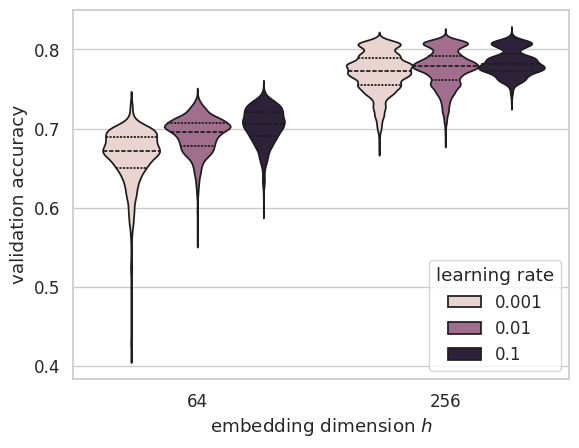

In [63]:
df = get_ds("Cora")
sns.violinplot(data=df, y=n_va, hue=n_lr, x=n_dim, hue_norm=matplotlib.colors.LogNorm(), inner="quart")
plt.savefig("imgs/Cora_h1.pdf", bbox_inches='tight')

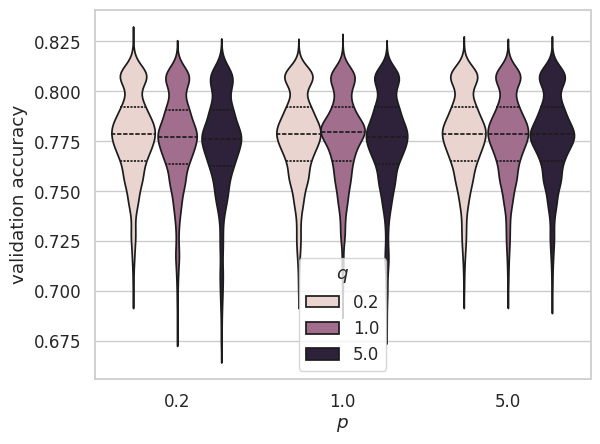

In [65]:
sns.violinplot(data=df[df[n_dim].eq(256)], y=n_va, x=n_p, hue=n_q, hue_norm=matplotlib.colors.LogNorm(), inner="quart")
plt.savefig("imgs/Cora_h2.pdf", bbox_inches='tight')

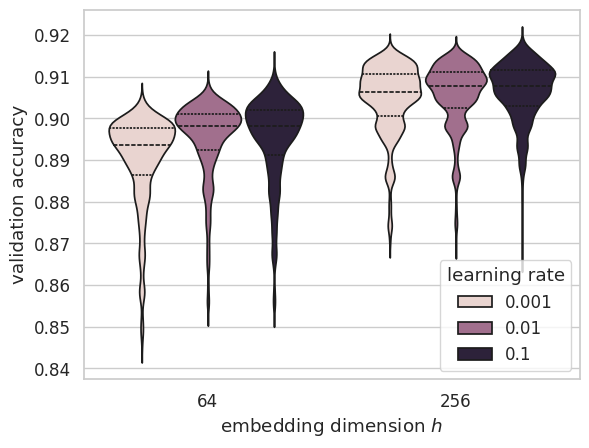

In [66]:
df = get_ds("Pho")
sns.violinplot(data=df, y=n_va, hue=n_lr, x=n_dim, hue_norm=matplotlib.colors.LogNorm(), inner="quart")
plt.savefig("imgs/Pho_h1.pdf", bbox_inches='tight')

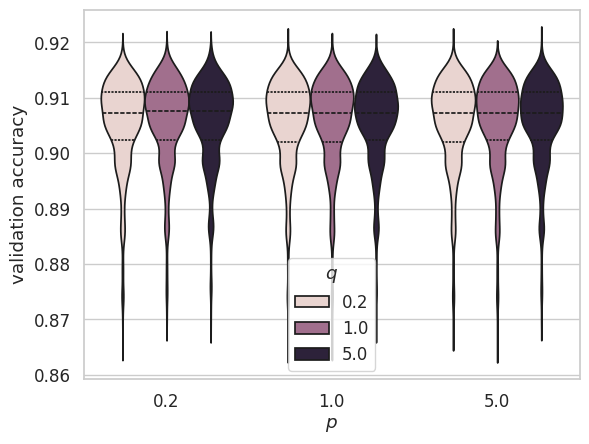

In [67]:
sns.violinplot(data=df[df[n_dim].eq(256)], y=n_va, x=n_p, hue=n_q, hue_norm=matplotlib.colors.LogNorm(), inner="quart")
plt.savefig("imgs/Pho_h2.pdf", bbox_inches='tight')

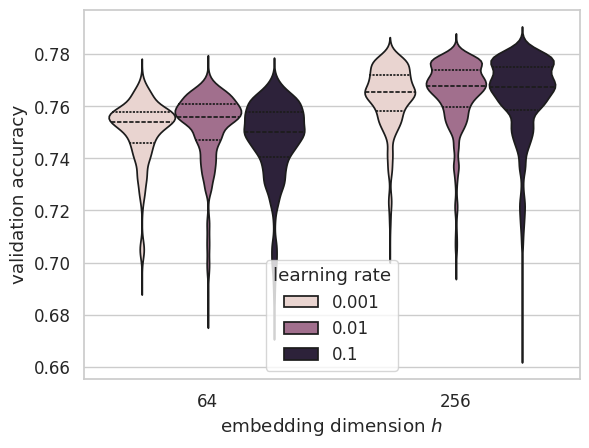

In [68]:
df = get_ds("WCS")
df[["d", "alpha"]] = df.delay_alpha.str.split("_", expand=True)
df=df[df.alpha.ne("fp")]

sns.violinplot(data=df, y=n_va, hue=n_lr, x=n_dim, hue_norm=matplotlib.colors.LogNorm(), inner="quart")
plt.savefig("imgs/WCS_h1.pdf", bbox_inches='tight')

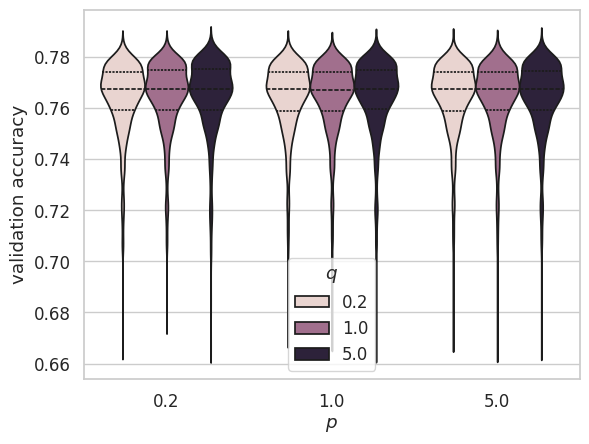

In [69]:
sns.violinplot(data=df[df[n_dim].eq(256)], y=n_va, x=n_p, hue=n_q, hue_norm=matplotlib.colors.LogNorm(), inner="quart")
plt.savefig("imgs/WCS_h2.pdf", bbox_inches='tight')